<a href="https://colab.research.google.com/github/santiagorivas0/Prediccion-de-Abandono-de-Clientes-Bancarios/blob/main/ProyectoDS_ParteIII_RivasQuinteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

### **¿QUÉ TIPOS DE VARIABLES INFLUYEN EN EL ABANDONO BANCARIO DE NUESTROS CLIENTES?**

**OBJETIVOS**

Nuestro objetivo principal consiste en analizar estadísticamente mediante regresiones lineales cómo y qué variables afectan nuestra variable de interés (cantidad de abandonos bancarios). Para ello, haremos varias regresiones tomando en cuenta los abandonos bancarios y así relacionarlos con el salario estimado, el credit score, el género, la edad, el balance de su cuenta, su contexto geográfico (español, francés o alemán), si posee tarjeta de crédito, entre otros. 


**INTRODUCCIÓN**

**Contexto empresarial**. Estamos evaluando que en el banco que trabajamos notamos que ha ido en incremento el abandono de nuestros clientes dentro de nuestra región de estudio (España, Francia y Alemania). Se identificarán patrones de comportamiento de acuerdo a parámetros como salario estimado, género, tenencia de tarjeta de crédito y Credit score. 

**Problema empresarial**. A través de visualizaciones y formateo de datos se responderán las siguientes preguntas ¿Los clientes con menor salario estimado son los que abandonan más fácil su cuenta bancaria? ¿Los hombres abandonan más fácil que las mujeres? ¿La edad influye en el abandono bancario? ¿La tenencia de una tarjeta de crédito influye en el abandono bancario? ¿El contexto geográfico importa? ¿Los clientes con credit score más alto son mas propensos a no abandonar?¿De qué forma se podría evitar o disminuir el abandono? 

**Contexto analítico**. Realizaremos los gráficos debidos utilizando los datos proporcionados por la empresa para así lograr comprender nuestra variable "Exited" y cómo está relacionada con las demás. Utilizaremos los modelos de regresión para así finalmente poder dar una conclusión más sólida. Luego de tener está conclusión podremos discutir el por qué se están dando esos resultados y poder tomar acción sobre los mismos. 

In [ ]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*Descripción de variables de nuestro DataSet:*
  1. **RowNumber:** Cantidad de clientes enumerados del 1 al 10.0000
  2. **CustomerId:** ID de nuestro cliente
  3. **Surname:** Apellido del cliente
  4. **CreditScore:** Puntaje de crédito del cliente
  5. **Geography:** Residencia del cliente
  6. **Gender:** Sexo 
  7. **Age:** Edad del cliente
  8. **Tenure:** Tenencia del cliente
  9. **Balance:** Balance del cliente
  10. **NumOfProducts:** Número de Productos
  11. **HasCrCard:** Tenencia de tarjeta de crédito (1 si, 0 en otro caso) 
  12. **IsActiveMember:** Miembro activo (1 si, 0 en otro caso)
  13. **EstimatedSalary:** Salario estimado del cliente
  14. **Exited:** Abandono del cliente (1 si, 0 en otro caso)









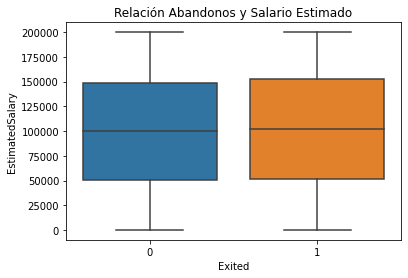

In [ ]:
sns.boxplot (x='Exited', y='EstimatedSalary', data= df)
plt.title("Relación Abandonos y Salario Estimado");

Como banco, esperabamos que los clientes los cuales tienen salario estimado más bajo sean más propensos a abandonar más fácil. Para que esta suposición se cumpla, tendríamos que haber observado que el boxplot de la derecha este por debajo del de la izquierda ó que el boxplot de la izquierda sea superior al de la derecha, cosa que no ocurrió. Lo que a priori nos dice que no existe una relación entre el salario y el abandono.

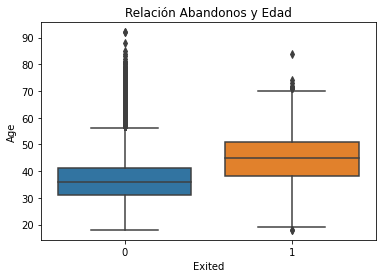

In [ ]:
sns.boxplot (x='Exited', y='Age', data= df)
plt.title("Relación Abandonos y Edad");

Es de esperarse que, a mayor edad los clientes abandonen menos fácil debido a varias cuestiones, como por ejemplo su madurez, responsabilidades, etc. A pesar de esto, el gráfico nos muestra que los clientes que abandonaron, su edad es concentrada en mas años que en clientes que no abandonaron. Aunque se aprecian varios datos atípicos en los clientes que no abandonaron (más que en los abandonados)

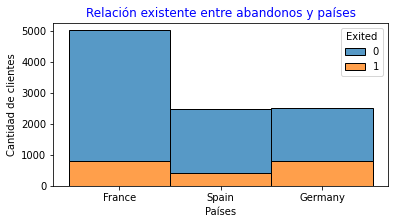

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))

sns.histplot(data=df, x="Geography", hue="Exited", multiple="stack");

ax.set_title('Relación existente entre abandonos y países', color='blue')
ax.set_xlabel('Países')
ax.set_ylabel('Cantidad de clientes');

Se observa que la relación que tiene Alemania entre abandonos/no abandonos es mayor que en la de los otros dos países (Francia y España).


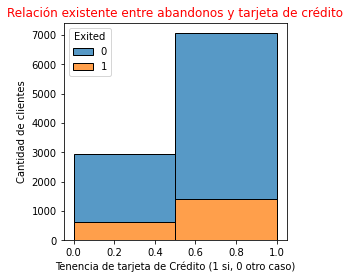

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

sns.histplot(data=df, x="HasCrCard", hue="Exited", multiple="stack", bins=2);

ax.set_title('Relación existente entre abandonos y tarjeta de crédito', color='red')
ax.set_xlabel('Tenencia de tarjeta de Crédito (1 si, 0 otro caso)')
ax.set_ylabel('Cantidad de clientes');

Podemos ver la relación que existe entre la tenencia de una tarjeta de crédito 
y el abandono. La relación abandono/no abandono es mas notoria en personas que no tienen tarjeta de crédito. En cambio, clientes que tienen tarjeta de crédito, parece ser que abandonan menos.

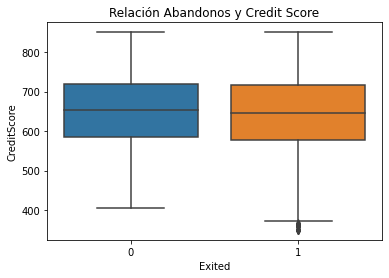

In [ ]:
sns.boxplot (x='Exited', y='CreditScore', data= df)
plt.title("Relación Abandonos y Credit Score");

Es de esperarse que los clientes que tienen menos Credit Score abandonen más fácil. Observamos que los clientes que no abandonaron (0), la acumulación hasta la mediana está levemente por encima de clientes que abandonaron (1). Además, vemos muchos datos atípicos por debajo del bigote inferior de clientes que abandonaron. Esto nos puede hacer ver que clientes con Credit Score muy bajos son propensos a abandonar con más facilidad.

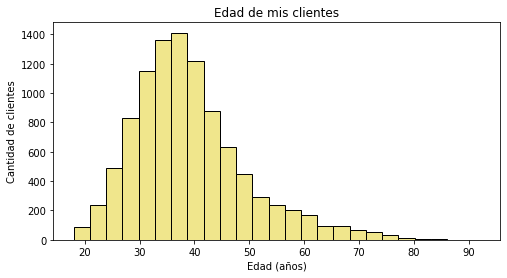

In [ ]:
edad_clientes = df['Age']
edad_clientes.value_counts()

fig, ax = plt.subplots(figsize=(8,4))

ax.set_title('Edad de mis clientes')
ax.set_xlabel('Edad (años)')
ax.set_ylabel('Cantidad de clientes')

x_hist = edad_clientes.values.flatten()
ax.hist(x_hist, bins= 25, ec='black', color='khaki');

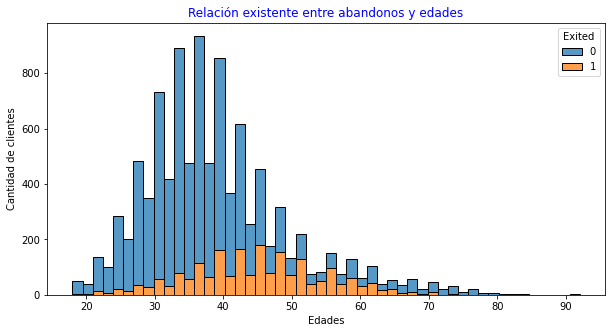

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=df, x="Age", hue="Exited", bins=50, multiple="stack");
ax.set_title('Relación existente entre abandonos y edades', color='blue')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de clientes');

Observamos que las edades que abandonan más son las que estan en el rango etario de 35 a 50 años. Esto no tiene porque signifar necesariamente que las personas de esta categoria esten abandonando mas que otros rangos de edades debido a que posiblemente hayan mas personas muestreadas en dicha franja.

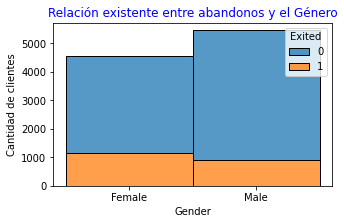

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))

sns.histplot(data=df, x="Gender", hue="Exited", multiple="stack");

ax.set_title('Relación existente entre abandonos y el Género', color='blue')
ax.set_xlabel('Gender')
ax.set_ylabel('Cantidad de clientes');

En el gáfico anterior se comparó la relación del género de los clientes, con el abandono. Se puede observar que tienen más abandono las mujeres; mientras que los hombres son más en la muestra y tienen un abandono inferior. En este análisis no se ha tenido en cuenta la edad de los clientes ni el poder adquisitivo. 

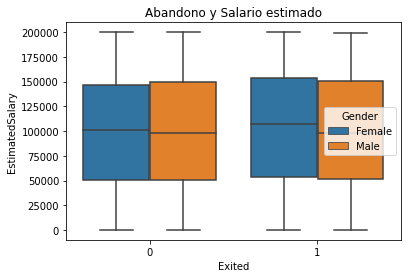

In [ ]:
sns.boxplot (x='Exited', y='EstimatedSalary', hue = 'Gender', data= df)
plt.title("Abandono y Salario estimado", fontsize=12);

En este gráfico se evalúa la relación entre el abandono, el salario estimado y el género de los clientes. Se puede apreciar que las mujeres que más abandonan son las que tienen mayor salario, mientras que los hombres que abandonan tienen menor salario estimado. Esta diferenciación nos demuestra que la conlusión sacada a priori entre la relación entre el abandono y el salario estimado no son tan independientes si se las diferencia por género.




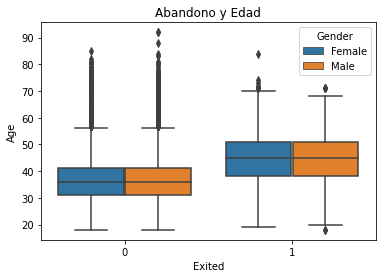

In [ ]:
sns.boxplot (x='Exited', y='Age', hue = 'Gender', data= df)
plt.title("Abandono y Edad", fontsize=12);

En esta figura se evalúa el abandono en relación a la edad y el género. Se puede ver que las mujeres y los hombres que abandonan y los que mantienen los préstamos son los de mayor edad. Es decir independientemente del género los más jóvenes no abandonan los pagos de los préstamos. Si bien cuando se analizó el abandono vs la edad, reflejaba lo mismo, al diferenciarlo por género se mantiene la relación anterior.

**LOGISTIC REGRESSION**

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_geography = pd.get_dummies(df["Geography"], prefix="Geography")

In [ ]:
df1 = df.drop(["Surname", "CustomerId","Tenure","RowNumber"], axis=1)

Consideramos que las variables "Surname" ("Apellido"), "CustomerID" y "Tenure" no son de importancia para nuestro Dataset por eso decidimos eliminar dichas variables.



In [ ]:
df2 = df1.drop(["Geography"], axis=1)
df3 = df2.drop(["Gender"], axis=1)

In [ ]:
df3.shape

(10000, 8)

In [ ]:
df3 = pd.concat([df3, dummy_gender, dummy_geography], axis=1)
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [ ]:
df3 = df3[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Spain','Exited']]
df3.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain,Exited
0,619,42,0.00,1,1,1,101348.88,0,1,0,1
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,0,1,0,1
3,699,39,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


Decidimos omitir las variables "Gender_Female" y "Geography_Germany" para no causar una dependencia entre variables

In [ ]:
X = df3.iloc[:, :10]
y = df3.iloc[:, -1]

In [ ]:
X.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,0,1,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1
2,502,42,159660.80,3,1,0,113931.57,0,1,0
3,699,39,0.00,2,0,0,93826.63,0,1,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=1)

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
X_train.shape

(7000, 10)

In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                      k_features = 7,
                                                      forward = True, 
                                                      floating = False, 
                                                      verbose = 2,
                                                      scoring = "accuracy",
                                                      cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished

[2022-11-30 18:59:37] Features: 1/7 -- score: 0.8212857142857143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.7s finished

[2022-11-30 18:59:55] Features: 2/7 -- score: 0.8327142857142856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.9s finished

[2022-11-30 19:00:11] Features: 3/7 -- score: 0.8531428571428572[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
forward_feature_selection.k_feature_names_

('Age',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Geography_France',
 'Geography_Spain')

In [ ]:
forward_feature_selection.k_score_

0.8395714285714286

**SISTEMA DE CLASIFICACIÓN CON REGRESIÓN LOGISTICA**



In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 4000)

In [ ]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

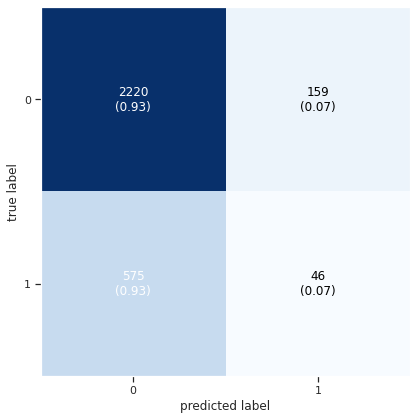

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=True)
plt.tight_layout();

Con las variables que mejor aproximan nuestro modelo que son: "Age", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "Geography_France"; "Geography_Spain" nuestra variable target "Exited" puede identificar 2220 verdaderos positivos y 46 verdaderos negativos.
Además, nuestro modelo con sus mejores variables cuenta con 159 falsos negativos y 575 falsos positivos. 